<a href="https://colab.research.google.com/github/sarathi-vs13/Deep-Learning/blob/main/Mask_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

import os
import sys
import random
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from google.colab import files
uploaded = files.upload()


Saving GrayScale28X28MaskDataSet.zip to GrayScale28X28MaskDataSet.zip


In [4]:
!unzip GrayScale28X28MaskDataSet.zip


Streaming output truncated to the last 5000 lines.
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/10.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/100.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1004.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1005.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1006.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1007.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1008.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1009.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/101.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1010.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1011.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1012.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1013.png  
 extracting: GrayScale28X28MaskDataSet/Train/WithoutMask/1018.png  
 

In [5]:
!apt-get install tree


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (105 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
#!tree GrayScale28X28MaskDataSet
!tree -L 2 GrayScale28X28MaskDataSet

GrayScale28X28MaskDataSet
├── Test
│   ├── WithMask
│   └── WithoutMask
└── Train
    ├── WithMask
    └── WithoutMask

6 directories, 0 files


In [7]:
path = 'GrayScale28X28MaskDataSet'

In [8]:
res = list(os.walk(path))

In [9]:
res

[('GrayScale28X28MaskDataSet', ['Train', 'Test'], []),
 ('GrayScale28X28MaskDataSet/Train', ['WithoutMask', 'WithMask'], []),
 ('GrayScale28X28MaskDataSet/Train/WithoutMask',
  [],
  ['4289.png',
   '3296.png',
   '70.png',
   '1532.png',
   '5000.png',
   '3997.png',
   '3008.png',
   '5562.png',
   '5290.png',
   '2378.png',
   '5352.png',
   '566.png',
   '2822.png',
   '3834.png',
   '41.png',
   '657.png',
   '2590.png',
   '1095.png',
   '856.png',
   '2259.png',
   '3244.png',
   '2829.png',
   '761.png',
   '3803.png',
   '4900.png',
   '2761.png',
   '3632.png',
   '5152.png',
   '3999.png',
   '3701.png',
   '5115.png',
   '257.png',
   '313.png',
   '3582.png',
   '4201.png',
   '1030.png',
   '4882.png',
   '4313.png',
   '3346.png',
   '4149.png',
   '677.png',
   '1310.png',
   '1044.png',
   '3855.png',
   '1063.png',
   '5773.png',
   '1446.png',
   '5141.png',
   '136.png',
   '4731.png',
   '24.png',
   '3175.png',
   '377.png',
   '5418.png',
   '3202.png',
   '1718.

In [10]:
path = 'GrayScale28X28MaskDataSet'
X_3D = []
y_li = []
files = []
# r=root, d=directories, f = files
for r, d ,f in os.walk(path):
    for file in f:
        file_path = os.path.join(r,file)
        files.append(file_path)
random.shuffle(files)

for fi in files:
    image = Image.open(fi)
    X_3D.append(np.asarray(image))
    if 'without' in fi.lower():
        y_li.append(0)
    else:
        y_li.append(1)

In [11]:
X = np.array(X_3D)

#Normalize


In [12]:
X.shape

(10992, 28, 28)

In [13]:
Y = np.array(y_li).astype(int)

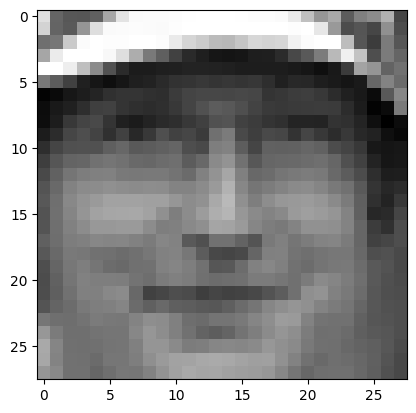

In [14]:
plt.figure()
plt.imshow(X[11], cmap = 'grey')

In [15]:
print(X.shape)
print(Y.shape)

(10992, 28, 28)
(10992,)


In [16]:
train_im = X[:7000]
train_la = Y[:7000]
test_im = X[7000:]
test_la = Y[7000:]
#Since it is already randomized , a normal split would work

In [17]:
train_la.shape

(7000,)

In [18]:
test_im.shape

(3992, 28, 28)

In [19]:
class_names = ['No mask', 'Mask']

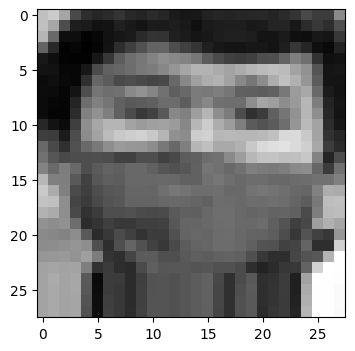

In [20]:
plt.figure(figsize=(4,4))
plt.imshow(train_im[1],cmap='gray')
plt.show()


<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | ColorizingArtist | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

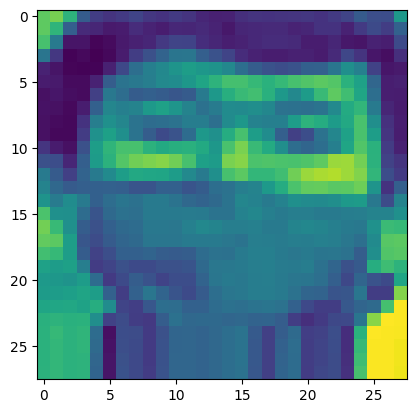

In [21]:
plt.figure()
plt.imshow(train_im[1])
plt.colorbar

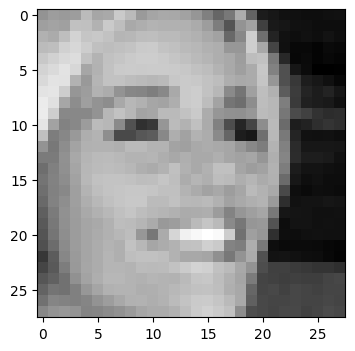

In [22]:
plt.figure(figsize=(4,4))
plt.imshow(X[0],cmap='gray')
plt.show()

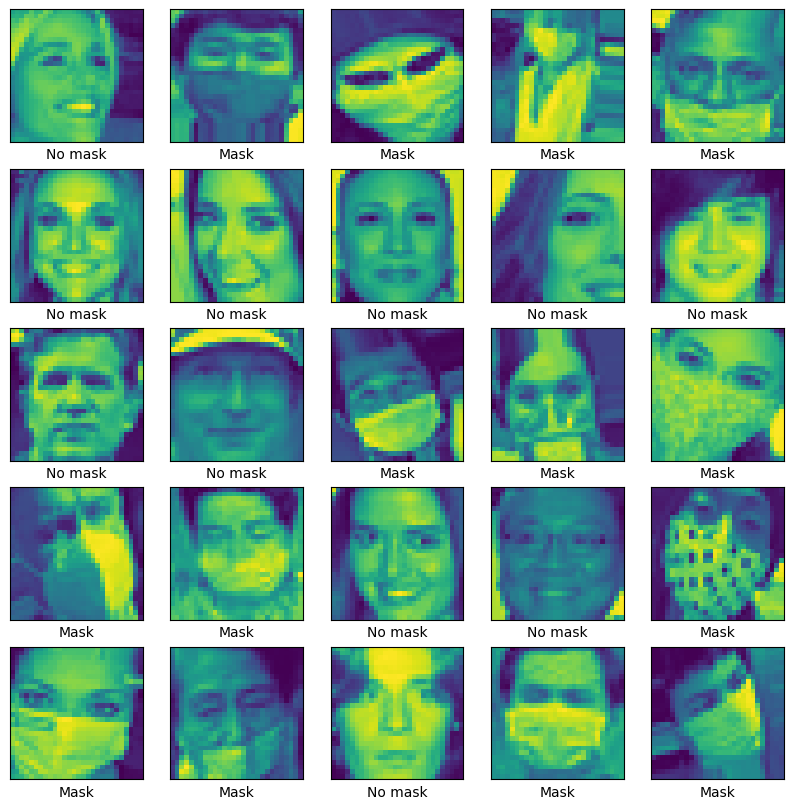

In [23]:
# Viewing 25 sample images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_im[i])#,cmap='gray')
    plt.xlabel(class_names[train_la[i]])



In [24]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation=tf.nn.relu),       # hidden layer 1 with 256 neurons
    keras.layers.Dense(256,activation=tf.nn.relu),       # hidden layer 2 with 256 neurons
#   keras.layers.Dropout(0.2),                           # dropout layer
#    keras.layers.Dense(1,activation = tf.nn.sigmoid)     # Op layer
   keras.layers.Dense(2,activation = tf.nn.softmax)     # Op layer
])

In [25]:
opt = tf.keras.optimizers.Adam()

In [26]:
#Compile
model.compile(optimizer = opt,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
#Fit
history = model.fit(train_im, train_la, epochs=10,validation_split=0.2)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6233 - loss: 29.0209 - val_accuracy: 0.8543 - val_loss: 0.7656
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8301 - loss: 0.8300 - val_accuracy: 0.8693 - val_loss: 0.4201
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8462 - loss: 0.4883 - val_accuracy: 0.8679 - val_loss: 0.4143
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8856 - loss: 0.3421 - val_accuracy: 0.8693 - val_loss: 0.3545
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8593 - loss: 0.4264 - val_accuracy: 0.8879 - val_loss: 0.2929
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8801 - loss: 0.3321 - val_accuracy: 0.8379 - val_loss: 0.4517
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8437 - loss: 0.4576 - val_accuracy: 0.8436 - val_loss: 0.4751
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8773 - loss: 0.3320 - val_accuracy:

In [47]:
from kerastuner.tuners import RandomSearch

def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Tune number of units in the first Dense layer
    # Choose an optimal value between 32 to 256
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))

    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    # Tune learning rate
    # Choose an optimal value from 0.01, 0.001 or 0.0001
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [48]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [49]:
# Define Tuner
tuner = kt.GridSearch(model_builder,
                      objective='val_loss',
                      overwrite=True,
                      directory='my_dir',
                      project_name='mask_cl')

In [50]:
# Run tuner
tuner.search(train_im,train_la,epochs=10,validation_split=0.2,callbacks=[stop_early])

Trial 24 Complete [00h 00m 19s]
val_loss: 0.8666010499000549

Best val_loss So Far: 0.27730125188827515
Total elapsed time: 00h 05m 30s


In [51]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]

In [52]:
 print(best_hps)

In [53]:
best_hps.get('units')

64

In [54]:
best_hps.get('learning_rate')

0.001

In [55]:
print(f"""
The hyperparameter search is complete.
The optimal number of units in the hidden layer is {best_hps.get('units')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}
""")


The hyperparameter search is complete.
The optimal number of units in the hidden layer is 64.
The optimal learning rate for the optimizer is 0.001



In [56]:
best_model = tuner.get_best_models()[0]

In [57]:
# Best model summary()

In [58]:
best_model.evaluate(test_im,test_la)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8764 - loss: 0.2868


[0.28864380717277527, 0.8815129995346069]

In [59]:
predictions = best_model.predict(test_im)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801,800 (3.06 MB)

 Trainable params: 267,266 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 534,534 (2.04 MB)

In [61]:
#Best model summary
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,370 (196.76 KB)

 Trainable params: 50,370 (196.76 KB)

 Non-trainable params: 0 (0.00 B)